In [136]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from numpy import log10
import os 
from glob import glob
import warnings
from astropy.modeling.fitting import LevMarLSQFitter
from dust_extinction.shapes import FM90

In [137]:
root_dir = r"C:\Users\kispz\OneDrive - Texas State University\REU MMA\Data\dirtygrid_dustony_2jun25"

output_rows = []

fits_files = [f for f in glob(os.path.join(root_dir, "*", "*", "*", "*")) if f.endswith('.fits')]


# print (f"Found {len(fits_files)} FITS files")

In [129]:
for file_path in fits_files:
    with fits.open(file_path) as hdul:
        data = hdul[1].data
        wavelength = data['wavelength']

        # Strip units if needed
        if hasattr(wavelength, 'unit'):
            wavelength = wavelength.value

        # Get λ ≤ 0.55 μm
        shortwave = wavelength[wavelength <= 0.56]

        # Print results
        print(f"\nFile: {os.path.basename(file_path)}")
        print(f"λ ≤ 0.55 μm ({len(shortwave)} values):")
        print(np.round(shortwave, 4))


File: lmc2_bc10-wd01_cloudy_clumpy-s6.32456e+14-t0.1-m0.1-a1_global_lum.table.fits
λ ≤ 0.55 μm (18 values):
[0.0912 0.1009 0.1116 0.1235 0.1367 0.1512 0.1673 0.1851 0.2048 0.2266
 0.2507 0.2774 0.3069 0.3395 0.3756 0.4156 0.4598 0.5088]

File: lmc2_bc10-wd01_cloudy_clumpy-s6.32456e+14-t0.2-m0.1-a1_global_lum.table.fits
λ ≤ 0.55 μm (18 values):
[0.0912 0.1009 0.1116 0.1235 0.1367 0.1512 0.1673 0.1851 0.2048 0.2266
 0.2507 0.2774 0.3069 0.3395 0.3756 0.4156 0.4598 0.5088]

File: lmc2_bc10-wd01_cloudy_clumpy-s6.32456e+14-t0.5-m0.1-a1_global_lum.table.fits
λ ≤ 0.55 μm (18 values):
[0.0912 0.1009 0.1116 0.1235 0.1367 0.1512 0.1673 0.1851 0.2048 0.2266
 0.2507 0.2774 0.3069 0.3395 0.3756 0.4156 0.4598 0.5088]

File: lmc2_bc10-wd01_cloudy_clumpy-s6.32456e+14-t1.0-m0.1-a1_global_lum.table.fits
λ ≤ 0.55 μm (18 values):
[0.0912 0.1009 0.1116 0.1235 0.1367 0.1512 0.1673 0.1851 0.2048 0.2266
 0.2507 0.2774 0.3069 0.3395 0.3756 0.4156 0.4598 0.5088]

File: lmc2_bc10-wd01_cloudy_clumpy-s6.32456e+14

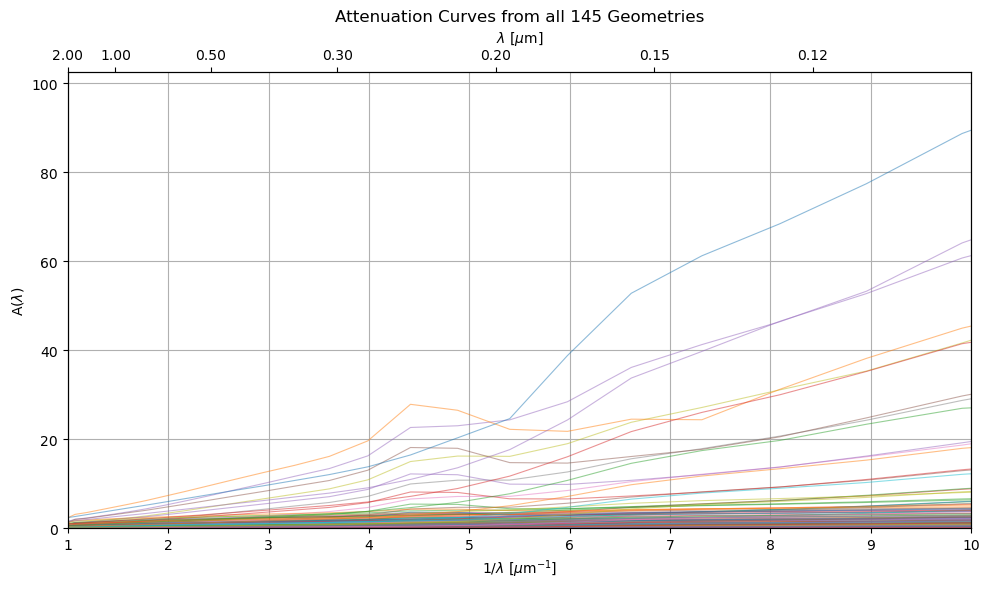

In [123]:
fig, ax = plt.subplots(figsize =  (10,6))

for file_path in fits_files: 
    with fits.open(file_path) as hdul: 
        data = hdul[1].data
        
        wavelength = data['wavelength'] * u.micron
        inv_lam = 1 / wavelength
        
        flux = data['flux']
        flux_input = data['flux_input']
        
        A = -2.5 * np.log10(flux/flux_input)
        
        ax.plot(inv_lam, A, alpha = 0.5, linewidth = 0.8)

ax.set_xlabel("1/$\lambda$ [$\mu$m$^{-1}$]")
ax.set_ylabel("A($\lambda$)")
ax.set_title("Attenuation Curves from all 145 Geometries")
ax.grid(True)
ax.set_xlim(1, 10)
ax.set_ylim(bottom = 0)

axis_xs = np.array([0.12, 0.15, 0.2, 0.3, 0.5, 1.0, 2.0])
new_ticks = 1.0 / axis_xs
new_ticks_labels = [f"{lam:.2f}" for lam in axis_xs]

tax = ax.twiny()
tax.set_xlim(ax.get_xlim())  # sync with 1/λ axis
tax.set_xticks(new_ticks)
tax.set_xticklabels(new_ticks_labels)
tax.set_xlabel(r"$\lambda$ [$\mu$m]")

# plt.axvline(x = 4.6)
plt.tight_layout()
plt.show()

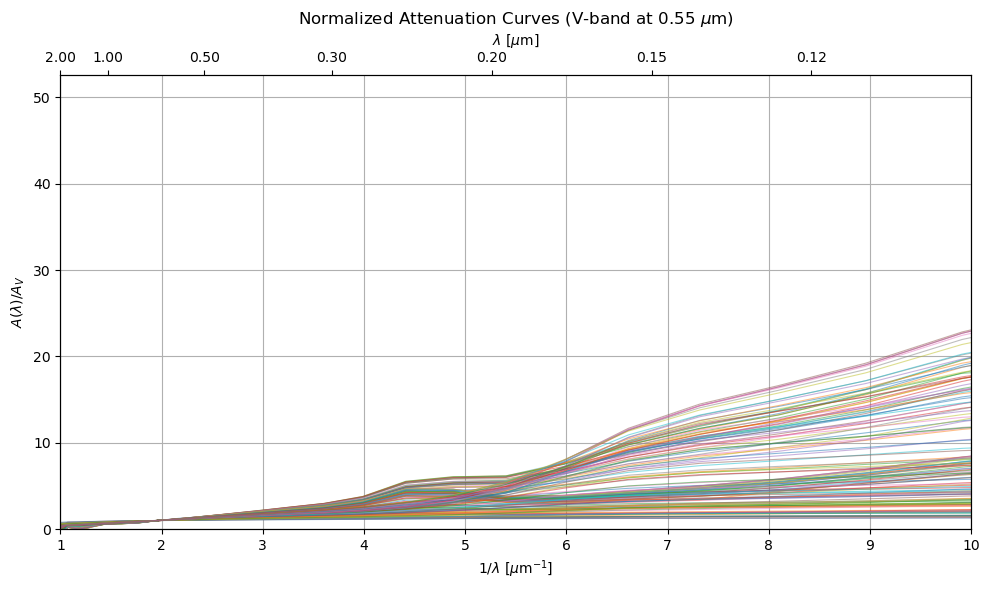

In [131]:
fig, ax = plt.subplots(figsize =  (10,6))

for file_path in fits_files: 
    with fits.open(file_path) as hdul: 
        data = hdul[1].data
        
        wavelength = data['wavelength']
        if hasattr(wavelength, 'unit'):
            wavelength = wavelength.value 
        inv_lam = 1 / wavelength
        
        flux = data['flux']
        flux_input = data['flux_input']
        
        A = -2.5 * np.log10(flux/flux_input)  

        #normalize at V-band (0.55 micron) The closest wavelength value we have is 5.08765e-01 micron
        v_band_idx = np.argmin(np.abs(wavelength - 0.5088))
        A_V = A[v_band_idx]
        A_norm = A/A_V
        
        ax.plot(inv_lam, A_norm, alpha = 0.5, linewidth = 0.8)

ax.set_xlabel("1/$\lambda$ [$\mu$m$^{-1}$]")
ax.set_ylabel("$A(\lambda)/A_V$")
ax.set_title("Normalized Attenuation Curves (V-band at 0.55 $\mu$m)")
ax.grid(True)
ax.set_xlim(1, 10)
ax.set_ylim(bottom = 0)

axis_xs = np.array([0.12, 0.15, 0.2, 0.3, 0.5, 1.0, 2.0])
new_ticks = 1.0 / axis_xs
new_ticks_labels = [f"{lam:.2f}" for lam in axis_xs]

tax = ax.twiny()
tax.set_xlim(ax.get_xlim())  # sync with 1/λ axis
tax.set_xticks(new_ticks)
tax.set_xticklabels(new_ticks_labels)
tax.set_xlabel(r"$\lambda$ [$\mu$m]")

# plt.axvline(x = 4.6)
plt.tight_layout()
plt.show()

C:\Users\kispz\anaconda3\Lib\site-packages\dust_extinction\helpers.py:30: UserWarning: x has no units, assuming x units are inverse microns
  warnings.warn(


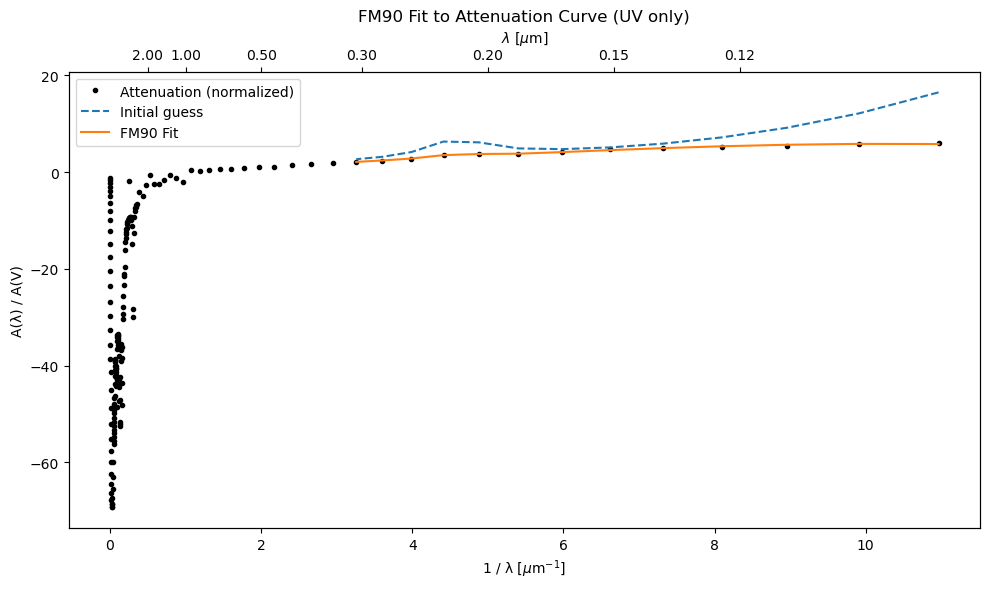

FM90 Best Fit Parameters:
C1 = -0.3167
C2 = 0.7331
C3 = 0.4790
C4 = -0.0907
x0 = 4.5925  (center of UV bump)
gamma = 0.8205  (width of bump)


In [165]:

file_path = r"C:\Users\kispz\OneDrive - Texas State University\REU MMA\Data\dirtygrid_dustony_2jun25\lmc2_bc10-wd01\cloudy\homo\lmc2_bc10-wd01_cloudy_homo-s6.32456e+14-t1.0-m0.1-a1_global_lum.table.fits"

with fits.open(file_path) as hdul:
    data = hdul[1].data
    wavelength = data['wavelength']
    flux = data['flux']
    flux_input = data['flux_input']

if hasattr(wavelength, 'unit'):
    wavelength = wavelength.value


A = - 2.5 * np.log10(flux / flux_input)

# Normalize by V-band (0.55 µm) 
v_idx = np.argmin(np.abs(wavelength - 0.5088))
A_V = A[v_idx]
A_norm = A / A_V

# convert to inverse microns
x = 1 / wavelength  
y = A_norm

# restrict to UV 
(gindxs,) = np.where(x > 3.125)
x_uv = x[gindxs]
y_uv = y[gindxs]

# Initialize FM90 model and fitter 
fm90_init = FM90()
fitter = LevMarLSQFitter()

# suppress unit warnings and fit 
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
    fm90_fit = fitter(fm90_init, x_uv, y_uv)


# plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, 'k.', label="Attenuation (normalized)")
ax.plot(x_uv, fm90_init(x_uv), label="Initial guess", linestyle='--')
ax.plot(x_uv, fm90_fit(x_uv), label="FM90 Fit")

ax.set_xlabel("1 / λ [$\mu$m$^{-1}$]")
ax.set_ylabel("A(λ) / A(V)")
ax.set_title("FM90 Fit to Attenuation Curve (UV only)")
ax.legend()

# top axis
axis_xs = np.array([0.12, 0.15, 0.2, 0.3, 0.5, 1.0, 2.0])
new_ticks = 1 / axis_xs
new_tick_labels = ["%.2f" % z for z in axis_xs]
tax = ax.twiny()
tax.set_xlim(ax.get_xlim())
tax.set_xticks(new_ticks)
tax.set_xticklabels(new_tick_labels)
tax.set_xlabel(r"$\lambda$ [$\mu$m]")

plt.tight_layout()
plt.show()

# print parameters 
print("FM90 Best Fit Parameters:")
print(f"C1 = {fm90_fit.C1.value:.4f}")
print(f"C2 = {fm90_fit.C2.value:.4f}")
print(f"C3 = {fm90_fit.C3.value:.4f}")
print(f"C4 = {fm90_fit.C4.value:.4f}")
print(f"x0 = {fm90_fit.xo.value:.4f}  (center of UV bump)")
print(f"gamma = {fm90_fit.gamma.value:.4f}  (width of bump)")
